In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd

def EnclosedCurve(r_random, N_angle, H, Center_X, Center_Y):
    ang = np.linspace(0, 2*np.pi/N_angle*(N_angle-1), N_angle)

    rho = np.random.rand(H) * 0.15 * np.logspace(-1.5, -2.5, H)
    phi = np.random.rand(H) * 2 * np.pi

    r = np.zeros(N_angle) + r_random

    for h in range(H):
        r = r + rho[h] * np.sin(h * ang + phi[h])

    x = r * np.cos(ang) + Center_X
    y = r * np.sin(ang) + Center_Y

    return x, y, r

def generate_random_array(N, mean, stddev, resolution, min_value, max_value):
    random_array = []
    while len(random_array) < N:
        random_value = rd.normalvariate(mean, stddev)
        rounded_value = round(random_value / resolution) * resolution
        if min_value <= rounded_value <= max_value:
            random_array.append(rounded_value)
    return random_array

def save_image(filename, r_max, x_trunk_L1, y_trunk_L1, x_trunk_L2, y_trunk_L2, x_trunk_L3, y_trunk_L3, x_Bcavity, y_Bcavity, layer1, layer2, layer3, cavity_colour):
    plt.figure(figsize=(10, 10))
    plt.fill(x_trunk_L1, y_trunk_L1, color=layer1, linestyle='none')
    # plt.fill(x_trunk_L2, y_trunk_L2, color=layer2, linestyle='none')
    # plt.fill(x_trunk_L3, y_trunk_L3, color=layer3, linestyle='none')
    plt.fill(x_Bcavity, y_Bcavity, color=cavity_colour, linestyle='none')
    plt.xlabel('x(t)')
    plt.ylabel('y(t)')
    plt.axis([-r_max, r_max, -r_max, r_max])

    # circle = plt.Circle((0, 0), r_max, color='white', fill=False, linestyle='solid', linewidth=1)
    # plt.gca().add_patch(circle)
    
    # Set the aspect ratio to be equal
    plt.gca().set_aspect('equal')
    # Apply tight layout
    plt.tight_layout()
    plt.axis('off')
    plt.savefig(filename, format='png', dpi=300, bbox_inches='tight', transparent=True, pad_inches=0, pil_kwargs={'icc_profile': None})
    plt.close()
    
N_trunk = 10

# Set parameters
Rmin_trunk = 0.15
Rmax_trunk = 0.30
CenTrunk_X = 0
CenTrunk_Y = 0
N_angle = 360
safety_d = 0.01

# Small cavity, if not needed can be removed
Rmin_Scavity = 0.03
Rmax_Scavity = 0.09

layer1 = [1, 1, 0]
layer2 = [1, 0.8, 0]
layer3 = [1, 0.6, 0]
cavity_colour = [1, 0.2, 0]

# Initialize arrays to store data
x_trunk_L1 = np.zeros((N_trunk, N_angle))
y_trunk_L1 = np.zeros((N_trunk, N_angle))
x_trunk_L2 = np.zeros((N_trunk, N_angle))
y_trunk_L2 = np.zeros((N_trunk, N_angle))
x_trunk_L3 = np.zeros((N_trunk, N_angle))
y_trunk_L3 = np.zeros((N_trunk, N_angle))
x_Bcavity = np.zeros((N_trunk, N_angle))
y_Bcavity = np.zeros((N_trunk, N_angle))
r_trunk_L3 = np.zeros((N_trunk, N_angle))
r_trunk_L2 = np.zeros((N_trunk, N_angle))
r_trunk_L1 = np.zeros((N_trunk, N_angle))
r_Bcavity = np.zeros((N_trunk, N_angle))
hole_factor = np.zeros(N_trunk)
R_center_Bcavity = np.zeros(N_trunk)
theta_Bcavity = np.zeros(N_trunk)
CenBcavity_X = np.zeros(N_trunk)
CenBcavity_Y = np.zeros(N_trunk)

# Up: upperbound, IS: conductive layer, HW: heartwood
up_IS = 0.9
lo_IS = 0.75
up_bark = 1.1
lo_bark = 1.05

radius = generate_random_array(N_trunk, 0.3, 0.06, 0.002, 0.2, 0.4)
eps_trunk = generate_random_array(N_trunk, 10, 2, 0.1, 5, 15)
eps_cavity = 1
# eps_cavity = generate_random_array(N_trunk, 10, 2, 0.1, 5, 15)

for i in range(N_trunk):
    H = 8
    R_rand_trunk = np.random.rand(1)*(Rmax_trunk-Rmin_trunk) + Rmin_trunk
    x_trunk_L2[i], y_trunk_L2[i], r_trunk_L2[i] = EnclosedCurve(R_rand_trunk, N_angle, 13, CenTrunk_X, CenTrunk_Y)

    ratio_L3 = np.random.rand()*(up_IS-lo_IS) + lo_IS
    x_trunk_L3[i] = ratio_L3 * x_trunk_L2[i]
    y_trunk_L3[i] = ratio_L3 * y_trunk_L2[i]
    r_trunk_L3[i] = ratio_L3 * r_trunk_L2[i]

    ratio_L1 = np.random.rand()*(up_bark-lo_bark) + lo_bark
    x_trunk_L1[i] = ratio_L1 * x_trunk_L2[i]
    y_trunk_L1[i] = ratio_L1 * y_trunk_L2[i]
    r_trunk_L1[i] = ratio_L1 * r_trunk_L2[i]

    Rmin_trunk_L3 = np.min(r_trunk_L3[i])
    Rmax_Bcavity = 0.8 * Rmin_trunk_L3
    Rmin_Bcavity = 0.05
    hole_factor[i] = np.random.rand(1)
    R_rand_Bcavity = hole_factor[i] * (Rmax_Bcavity - Rmin_Bcavity) + Rmin_Bcavity

    min_d_Bcavity = 0.02
    max_d_Bcavity = Rmin_trunk_L3 - R_rand_Bcavity - safety_d
    R_center_Bcavity[i] = min_d_Bcavity + np.random.rand() * (max_d_Bcavity - min_d_Bcavity)
    theta_Bcavity[i] = 2 * np.pi * np.random.rand()
    CenBcavity_X[i] = R_center_Bcavity[i] * np.cos(theta_Bcavity[i])
    CenBcavity_Y[i] = R_center_Bcavity[i] * np.sin(theta_Bcavity[i])

    shape_factor = np.random.rand()
    max_shape = 20
    min_shape = 15
    shape_cavity = round(shape_factor * (max_shape - min_shape) + min_shape)
    x_Bcavity[i], y_Bcavity[i], r_Bcavity[i] = EnclosedCurve(R_rand_Bcavity, N_angle, shape_cavity, CenBcavity_X[i], CenBcavity_Y[i])

    save_image('image/defect/defect{}.png'.format(i),np.max(r_trunk_L1[i]), x_trunk_L1[i], y_trunk_L1[i], x_trunk_L2[i], y_trunk_L2[i], x_trunk_L3[i], y_trunk_L3[i], x_Bcavity[i], y_Bcavity[i], layer1, layer2, layer3, cavity_colour)
    save_image('image/healthy/healthy{}.png'.format(i),np.max(r_trunk_L1[i]), x_trunk_L1[i], y_trunk_L1[i], x_trunk_L2[i], y_trunk_L2[i], x_trunk_L3[i], y_trunk_L3[i], np.zeros((1, N_angle)), np.zeros((1, N_angle)), layer1, layer2, layer3, cavity_colour)
    
    print(CenBcavity_X[i], CenBcavity_Y[i], np.max(r_Bcavity[i]), radius[i], eps_trunk[i])


-0.015474128291024956 -0.019951721590671927 0.07929543008010774 0.28400000000000003 12.4
0.006889391783080204 -0.042808212091323364 0.08065463317280348 0.298 8.200000000000001
0.025516774821554396 0.004222989279391562 0.05437161449161313 0.328 11.9
0.03899654552555509 0.020216279945935202 0.11132069087823346 0.372 10.3
0.02130066749981058 0.0018246264878200406 0.13532549097184868 0.23600000000000002 9.3
0.05699396855925995 -0.01380926970616678 0.11805863122501967 0.386 11.5
-0.061384357319329376 0.04940235718732628 0.05960319061796133 0.226 10.700000000000001
-0.11389369055893327 -0.02679915038364266 0.08445360862990256 0.254 9.8
0.058597402541145364 0.052355411721385726 0.0921996806741641 0.28800000000000003 13.4
0.013708465374637734 -0.03658759467792544 0.12663981118133255 0.314 12.100000000000001


In [33]:
# # Load the PNG image
# image_path = "image/defect/defect0.png"
# img = Image.open(image_path).convert('RGBA')
# uni_colors = []
# for y in range(img.size[0]):
#     for x in range(img.size[1]):
#         pixel_color = img.getpixel((x, y))
#         # Check if pixel_color is not in uni_colors and add it
#         if pixel_color not in uni_colors:
#             uni_colors.append(pixel_color)
# img.show()

In [2]:
import csv
def max_row(arr):
    # Use numpy's max function along axis 1 to get the maximum of each row
    max_values = np.max(arr, axis=1)
    return max_values

def save_arrays_to_csv(file_path, *arrays):
    # Transpose the arrays to create rows from the corresponding elements
    rows = zip(*arrays)
    
    # Open the CSV file in write mode
    with open(file_path, 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        
        # Write each row to the CSV file
        for row in rows:
            writer.writerow(row)

# Example usage:
# Assuming you have six 1D arrays: array1, array2, array3, array4, array5, array6
# Specify the file path where you want to save the CSV file
file_path = 'data.csv'

# Call the function to save the arrays to the CSV file (it will overwrite the file if it exists)
save_arrays_to_csv(file_path, CenBcavity_X, CenBcavity_Y, max_row(r_Bcavity), max_row(r_trunk_L1), radius, eps_trunk)


In [ ]:
# # Import the Python Image processing Library
# from PIL import Image
# import matplotlib.pyplot as plt

# # Giving The Original image Directory Specified
# Original_Image = Image.open("image/defect/defect1.png")

# # Rotate Image By 180 Degree
# rotated_image1 = Original_Image.rotate(180)

# # This is Alternative Syntax To Rotate The Image
# rotated_image2 = Original_Image.rotate(30, expand = True)

# # This Will Rotate Image By 60 Degree
# rotated_image3 = Original_Image.rotate(60)

# # Get the resolutions of the images
# original_resolution = Original_Image.size
# rotated1_resolution = rotated_image1.size
# rotated2_resolution = rotated_image2.size
# rotated3_resolution = rotated_image3.size

# # Create a figure with subplots
# fig, axes = plt.subplots(1, 4, figsize=(12, 4))

# # Plot the original and rotated images side by side
# axes[0].imshow(Original_Image)
# axes[0].set_title(f'Original\nResolution: {original_resolution[0]}x{original_resolution[1]}')

# axes[1].imshow(rotated_image1)
# axes[1].set_title(f'Rotated 180°\nResolution: {rotated1_resolution[0]}x{rotated1_resolution[1]}')

# axes[2].imshow(rotated_image2)
# axes[2].set_title(f'Rotated 30°\nResolution: {rotated2_resolution[0]}x{rotated2_resolution[1]}')

# axes[3].imshow(rotated_image3)
# axes[3].set_title(f'Rotated 60°\nResolution: {rotated3_resolution[0]}x{rotated3_resolution[1]}')

# # Hide axes labels and display the plot
# for ax in axes:
#     ax.axis('off')

# plt.tight_layout()
# plt.show()


## 3D Bscan

### Testing

In [ ]:
# import math
# import numpy as np
# # Function to find the angle based on the currentPosition and L
# def find_angle(current_position, L, H):
#     if current_position < L:
#         L3 = L - current_position
#         current_angle = math.atan(H / L3) * 180 / math.pi
#     elif current_position > L:
#         L3 = current_position - L
#         current_angle = (math.atan(H / L3)) * 180 / math.pi
#         current_angle = 180 - current_angle
#     else:  # exactly middle
#         current_angle = 90

#     return current_angle - 90

# def bscan(L, H, count):
#     mid = L/2
#     step = (L/(count-1))
#     print(step)
#     dist = []
#     angle = []
#     for i in range(count):
#         dist.append(math.sqrt(H**2 + (mid - i*step)**2))
#         angle.append(find_angle(i*step,mid,H))
#     dist = np.array(dist)
#     rd_dist = np.round(dist / 0.002) * 0.002
#     rd_dist = [(round(x, len(str(0.002).split('.')[1]))) for x in rd_dist]

#     return dist,angle
# pos,rot = bscan(1,0.3,51)
# pos

In [ ]:
# import math

# def find_full_combinations(n):
#     combinations = []
#     max_value = math.isqrt(n) + 1  # Square root of n rounded up

#     for a in range(max_value):
#         for b in range(max_value):
#             if a**2 + b**2 == n:
#                 # combinations.append((a, b))
#                 # combinations.append((-a, b))
#                 # combinations.append((a, -b))
#                 combinations.append((-a, -b))
#     combinations.sort(key=lambda x: x[1])  # Sort combinations by first element
#     return combinations

In [ ]:
# import matplotlib.pyplot as plt
# import math 
# def plot_combinations(combinations):
#     x = [point[0] for point in combinations]
#     y = [point[1] for point in combinations]
    
#     plt.scatter(x, y)
#     plt.grid(True)
#     plt.axis('equal')
#     plt.show()
# arr = find_full_combinations(25**2)[1:]
# n = 0.002
# for x, y in arr:
#     if(y != 0):
#         print(x*n,y*n,math.atan(y/x)*180/math.pi)
#     else:
#         print(x*n,y*n,0)
# plot_combinations(find_full_combinations(25**2)[1:])

In [7]:
# import math
# from PIL import Image
# import os

# # Function to generate rotated images
# def generate_rotated_image(input_image_path, output_directory, angle):
#     # Create the output directory if it doesn't exist
#     if not os.path.exists(output_directory):
#         os.makedirs(output_directory)

#     original_image = Image.open(input_image_path)

#     # Rotate the original image by the calculated angle #rotate counter clockwise
#     rotated_image = original_image.rotate(angle)

#     # Save the rotated image with the angle in the filename
#     output_image_path = os.path.join(output_directory, f'defect0_{angle:.2f}.png')
#     rotated_image.save(output_image_path)
#     return output_image_path

# # Example usage:
# input_image_path = 'image/defect/defect0.png'
# output_directory = 'test'
# angle = math.atan(-0.4/ -0.3) * 180 / math.pi #math.atan(y/x)*180/math.pi #Just to test only
# image_path = generate_rotated_image(input_image_path, output_directory, angle)

### Example Usage

In [3]:
import math
from PIL import Image
import os

# Function to find the angle based on the currentPosition and L
def find_angle(current_position, L, H):
    if current_position < L:
        L3 = L - current_position
        current_angle = math.atan(H / L3) * 180 / math.pi
    elif current_position > L:
        L3 = current_position - L
        current_angle = (math.atan(H / L3)) * 180 / math.pi
        current_angle = 180 - current_angle
    else:  # exactly middle
        current_angle = 90

    return current_angle - 90

# Function to generate rotated images
def generate_rotated_images(input_image_path, output_directory, L, H, count):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    mid = L / 2
    step = (L / (count - 1))

    # Open the original image
    original_image = Image.open(input_image_path)
    dist = []
    for i in range(count):
        dist.append(math.sqrt(H**2 + (mid - i * step)**2))
        angle = find_angle(i * step, mid, H)

        # Rotate the original image by the calculated angle
        rotated_image = original_image.rotate(angle)

        # Save the rotated image with the angle in the filename
        output_image_path = os.path.join(output_directory, f'defect0_{i}.png')
        rotated_image.save(output_image_path)
    dist = np.array(dist)
    rd_dist = np.round(dist / 0.002) * 0.002
    rd_dist = [(round(x, len(str(0.002).split('.')[1]))) for x in rd_dist]
    return rd_dist

# Example usage:
input_image_path = 'image/defect/defect0.png'
output_directory = 'png'
L = 1
H = 0.3
count = 51
pos = generate_rotated_images(input_image_path, output_directory, L, H, count)
np.array(pos)

array([0.584, 0.566, 0.55 , 0.532, 0.516, 0.5  , 0.484, 0.468, 0.454,
       0.438, 0.424, 0.41 , 0.396, 0.384, 0.372, 0.36 , 0.35 , 0.34 ,
       0.332, 0.324, 0.316, 0.31 , 0.306, 0.302, 0.3  , 0.3  , 0.3  ,
       0.302, 0.306, 0.31 , 0.316, 0.324, 0.332, 0.34 , 0.35 , 0.36 ,
       0.372, 0.384, 0.396, 0.41 , 0.424, 0.438, 0.454, 0.468, 0.484,
       0.5  , 0.516, 0.532, 0.55 , 0.566, 0.584])

In [4]:
import os
import h5py
import numpy as np
from PIL import Image

# Constants
res = 200
input_dir = 'png'
output_dir = 'h5'

# Color map
color_map = {
    (0, 0, 0, 0): -1,
    (255, 255, 0, 255): 0,  # Yellow
    (255, 51, 0, 255): 1  # Red
}

# Function to check if a pixel color is approximately equal to a given color
def is_color_approx(pixel_color, target_color, tolerance=10):
    return all(abs(pixel_color[i] - target_color[i]) <= tolerance for i in range(len(pixel_color)))

# Iterate through all files in the input directory
for image_name in os.listdir(input_dir):
    if image_name.endswith(".png"):
        # Load the PNG image
        image_path = os.path.join(input_dir, image_name)
        img = Image.open(image_path)

        # Resize the image
        img_resized = img.resize((res, res))

        arr_2d = np.full((res, res), -1, dtype=int)  # Initialize the array with -1 for all values

        # Iterate through each pixel and assign values based on the color map
        for y in range(res):
            for x in range(res):
                pixel_color = img_resized.getpixel((x, y))

                # Check if the pixel color is approximately equal to a color in the color map
                matching_color = None
                for target_color, value in color_map.items():
                    if is_color_approx(pixel_color[:-1], target_color[:-1], tolerance=102):
                        matching_color = value
                        break

                if matching_color is not None:
                    arr_2d[y, x] = matching_color

        arr_3d = np.expand_dims(arr_2d, axis=2)

        # Extract the base filename without the extension
        base_filename = os.path.splitext(os.path.basename(image_path))[0]

        # Create the new filename with the resolution
        filename = f"{base_filename}_{res}.h5"

        filepath = os.path.join(output_dir, filename)

        # Create the output directory if it doesn't exist
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)

        # Create a dataset within the 'data' group and store the array
        with h5py.File(filepath, 'w') as file:
            dset = file.create_dataset("data", data=arr_3d)

            # Add a root attribute with the name 'dx_dy_dz'
            file.attrs['dx_dy_dz'] = (0.002, 0.002, 0.002)


In [ ]:
# # Create subplots to display the image and the array side by side
# fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# # Display the resized image on the left subplot
# axs[0].imshow(img_resized)
# axs[0].set_title('Resized Image')

# # Display the arr_2d array on the right subplot
# axs[1].imshow(arr_2d, cmap='viridis')  # You can change the cmap as needed
# axs[1].set_title('2D Array')

# plt.show()

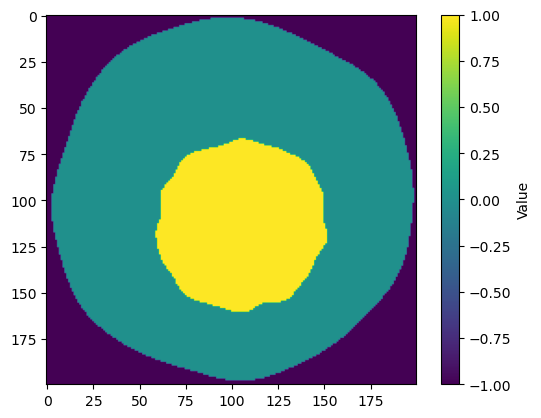

In [5]:
import matplotlib.pyplot as plt
with h5py.File('h5/defect0_50_200.h5', 'r') as f:
    dt = f['data'][()]

# Generate the image
plt.imshow(dt, cmap='viridis')

# Add a colorbar legend
cbar = plt.colorbar()
cbar.set_label('Value')

# Display the image
plt.show()

f.close()


In [8]:
idx = 25
#Params
b_scan_cnt = 51
resolution = 0.002
time_window = 3e-8
pml_cells = 25

x_gap = 0.05
y_gap = 0.02
src_to_pml = 0.05

radius =  0.2
src_to_trunk_center = pos[idx]
src_to_rx = 0.1

# Derived Parameters
src_to_trunk = src_to_trunk_center-radius
    
diameter = radius* 2
pml = resolution * pml_cells
sharp_domain = [diameter, diameter + src_to_trunk]
domain = [sharp_domain[0] + pml * 2 + x_gap * 2, sharp_domain[1] +  pml * 2 + y_gap + src_to_pml]

trunk_center = [radius + pml + x_gap, src_to_trunk + radius + pml + src_to_pml]
src_position = [trunk_center[0] - (src_to_rx / 2), pml + src_to_pml, 0]
rx_position = [src_position[0] + src_to_rx, src_position[1], 0]

print('#title: Rotating Straight Scan')
print("#domain: {:.3f} {:.3f} 0.002".format(domain[0], domain[1]))
print("#dx_dy_dz: {} {} {}".format(resolution, resolution, resolution))
print("#time_window: {}".format(time_window))
print()
print('#pml_cells: {} {} 0 {} {} 0'.format(pml_cells, pml_cells, pml_cells, pml_cells))
print()
print("#geometry_objects_read: {:.3f} {:.3f} 0 h5/defect0_{}_200.h5 materials.txt".format((trunk_center[0]) - radius, (trunk_center[1]) - radius, idx))
print()
print('#waveform: ricker 1 1e9 my_ricker')
print("#hertzian_dipole: z {:.3f} {:.3f} {:.3f} my_ricker".format(src_position[0], src_position[1], src_position[2]))
print("#rx: {:.3f} {:.3f} {:.3f}".format(rx_position[0], rx_position[1], rx_position[2]))
print("#geometry_objects_write: 0 0 0 {:.3f} {:.3f} 0.002 new{}".format(domain[0], domain[1],idx))

#title: Rotating Straight Scan
#domain: 0.600 0.670 0.002
#dx_dy_dz: 0.002 0.002 0.002
#time_window: 3e-08

#pml_cells: 25 25 0 25 25 0

#geometry_objects_read: 0.100 0.200 0 h5/defect0_25_200.h5 materials.txt

#waveform: ricker 1 1e9 my_ricker
#hertzian_dipole: z 0.250 0.100 0.000 my_ricker
#rx: 0.350 0.100 0.000
#geometry_objects_write: 0 0 0 0.600 0.670 0.002 new25
